In [1]:
# Импортирование данных
import pandas as pd
import numpy as np
import seaborn as sns
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

In [2]:
# Извлечение данных в датафрейм
df_flags = pd.read_csv(url)

In [3]:
# Присваивание имен колонкам 
columns = ['name', 'landmass', 'zone', 
           'area', 'population', 'lang', 'religion',
          'bars', 'stripes', 'colours', 'red',
          'green', 'blue', 'gold', 'white',
          'black', 'orange', 'mainhue', 'cicrles',
          'crosses', 'saltires', 'quartets', 'sunstars', 'crescent',
          'triangle', 'icon', 'animate', 'text',
          'topleft', 'botright']
df_flags.columns = columns
df_flags.head()

,name,landmass,zone,area,population,lang,religion,bars,stripes,colours,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [4]:
# Присваивание переменной targets целевых значений
targets = df_flags.landmass
# Извлечение из выборки целевых значений и колонки name, так как она не имеет значения в классификации
data = df_flags.drop(['landmass'], axis=1)
data = df_flags.drop(['name'], axis=1)

In [5]:
# Присваивание строковым значениям соответствующие числовые значения
topleft = {'red': 1,'green': 2,'blue': 3,'white': 4,'black': 5,
         'orange': 6, 'gold': 7} 
botright = {'red': 1,'white': 2,'black': 3,'blue': 4,'green': 5,
         'orange': 6, 'gold': 7, 'brown': 8} 
mainhue = {'red': 1,'green': 2,'blue': 3,'gold': 4,
           'white': 5,'orange': 5,
         'black': 6, 'brown': 7} 
data.topleft = [topleft[item] for item in data.topleft]
data.botright = [botright[item] for item in data.botright]
data.mainhue = [mainhue[item] for item in data.mainhue]
new_data = data
new_data.head()

,landmass,zone,area,population,lang,religion,bars,stripes,colours,red,...,saltires,quartets,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,1,1
1,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,2,2
2,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,3,1
3,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,3,1
4,4,2,1247,7,10,5,0,2,3,1,...,0,0,1,0,0,1,0,0,1,3


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Приведение датафрейма к массиву numpy (необходимо для последующего использования PCA)
X = data.to_numpy()
y = targets.to_numpy()
# Нормализация данных (приведение всех значений к значениям в диапазоне от 0 до 1)
X = StandardScaler().fit_transform(X)
# Разделение на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2,random_state=20)

In [7]:
# Для создания прогнозов алгоритм knn использует все обучающие данные с их метками
# Количество ближаших соседей - это количество ближайших точек, 
# для которых уже известен класс (т.е они из тренировочного набора данных)
# В качестве прогноза выбирается наиболее распространенный класс среди ближайших соседей 
# Для нахождения ближайших точек используются различные виды расстояний:
# Евклидово, Хемминга, Манхэттена и Минковского
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/587/1*hncgU7vWLBsRvc8WJhxlkQ.png")

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Создание модели
# Для начала попробуем создать модель с 3 соседями, по умолчанию выбирается расстояние Минковского
model = KNeighborsClassifier(n_neighbors=3)
# Обучение модели
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
# Подготовка confusion матрицы для последующего отчета 
# В такой матрице можно рассмотреть количество совпадений предсказаний и ошибок
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5,6]))
confusion = pd.DataFrame(cm, index = ['N.America', 'S.America', 
                                      'Europe', 'Africa', 'Asia',
                                     'Oceania'], 
                         columns = ['predicted N.America', 
                                    'predicted S.America', 
                                      'predicted Europe', 
                                    'predicted Africa',
                                    'predicted Asia',
                                     'predicted Oceania'])
confusion

,predicted N.America,predicted S.America,predicted Europe,predicted Africa,predicted Asia,predicted Oceania
N.America,3,1,0,0,0,0
S.America,2,1,0,0,0,0
Europe,0,2,4,3,1,0
Africa,0,0,2,4,5,1
Asia,0,0,1,3,3,0
Oceania,0,0,1,0,0,2


In [10]:
# Создание классификационного отчета с метриками: общая точность, Recall, Precision, F1-measurehttp://my_site.com/my_picture.jpg
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       0.25      0.33      0.29         3
           3       0.50      0.40      0.44        10
           4       0.40      0.33      0.36        12
           5       0.33      0.43      0.38         7
           6       0.67      0.67      0.67         3

    accuracy                           0.44        39
   macro avg       0.46      0.49      0.47        39
weighted avg       0.44      0.44      0.43        39



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Создание модели c 5 ближайшими соседями
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
# Рассчет точности для 5 ближайших соседей
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5384615384615384


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Создание модели c 11 ближайшими соседями
model11 = KNeighborsClassifier(n_neighbors=11)
model11.fit(X_train, y_train)
y_pred = model11.predict(X_test)
# Рассчет точности для 11 ближайших соседей
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6153846153846154


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Создание модели c 100 ближайшими соседями
model100 = KNeighborsClassifier(n_neighbors=100)
model100.fit(X_train, y_train)
y_pred = model100.predict(X_test)
# Рассчет точности для 100 ближайших соседей
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [14]:
y_pred = model.predict(X_test)
print("Accuracy n_neighbors = 3:",metrics.accuracy_score(y_test, y_pred))
y_pred = model5.predict(X_test)
print("Accuracy n_neighbors = 5:",metrics.accuracy_score(y_test, y_pred))
y_pred = model11.predict(X_test)
print("Accuracy n_neighbors = 11:",metrics.accuracy_score(y_test, y_pred))
y_pred = model100.predict(X_test)
print("Accuracy n_neighbors = 100:",metrics.accuracy_score(y_test, y_pred))

Accuracy n_neighbors = 3: 0.4358974358974359
Accuracy n_neighbors = 5: 0.5384615384615384
Accuracy n_neighbors = 11: 0.6153846153846154
Accuracy n_neighbors = 100: 0.3333333333333333


In [15]:
# Выше мы видим, что при увеличении количества соседей до 11 точность растет, но далее, чем больше их становится,
# тем меньше становится точность
# Теперь проверим как меняется точность с изменением расстояний
# euclidean manhattan hamming
# Создание модели c 11 ближайшими соседями и Евклидовым расстоянием
modelEuclidean = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
modelEuclidean.fit(X_train, y_train)
y_pred = modelEuclidean.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6153846153846154


In [16]:
# Создание модели c 11 ближайшими соседями и расстоянием Манхэттена
modelManhattan = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
modelManhattan.fit(X_train, y_train)
y_pred = modelManhattan.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.717948717948718


In [17]:
# Создание модели c 11 ближайшими соседями и расстоянием Хэмминга
modelHamming = KNeighborsClassifier(n_neighbors=11, metric='hamming')
modelHamming.fit(X_train, y_train)
y_pred = modelHamming.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8974358974358975


In [18]:
# Затем попробуем изменить значения весов соседей, которые используются в голосовании
# ‘uniform’ - все соседи имеют одинаковый вес(используется по умолчанию)
# ‘distance’ - чем ближе сосед, тем больше весит его голос
modelDistance = KNeighborsClassifier(n_neighbors=11, metric='hamming', weights='distance')
modelDistance.fit(X_train, y_train)
y_pred = modelDistance.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8974358974358975


In [40]:
# Таким образом, можно наблюдать, что наилучшим классификатором является 
# модель с 11-ю соседями, расстоянием Хэмминга, и в данном случае значение веса голоса соседа не имеет значения.
# Выполним визуализацию для лучшего классификатора:
from sklearn.decomposition import PCA
import pylab as pl
pca_train = PCA(n_components=2).fit(X_train)
X_train = pca_train.transform(X_train)
pca_test = PCA(n_components=2).fit(X_test)
X_test = pca_train.transform(X_test)
modelPCA = KNeighborsClassifier(n_neighbors=11, metric='hamming', weights='distance')
modelPCA.fit(X_train, y_train)
y_pred = modelPCA.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1794871794871795


In [42]:
# Выше мы можем наблюдать падение точности с использованием PCA 
# PCA приводит размерность датасета к 2 основным компонентам
# Поэтому эксперементальным путем была выявлена модель с наилучшей точностью
modelPCA = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='distance')
modelPCA.fit(X_train, y_train)
y_pred = modelPCA.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.358974358974359


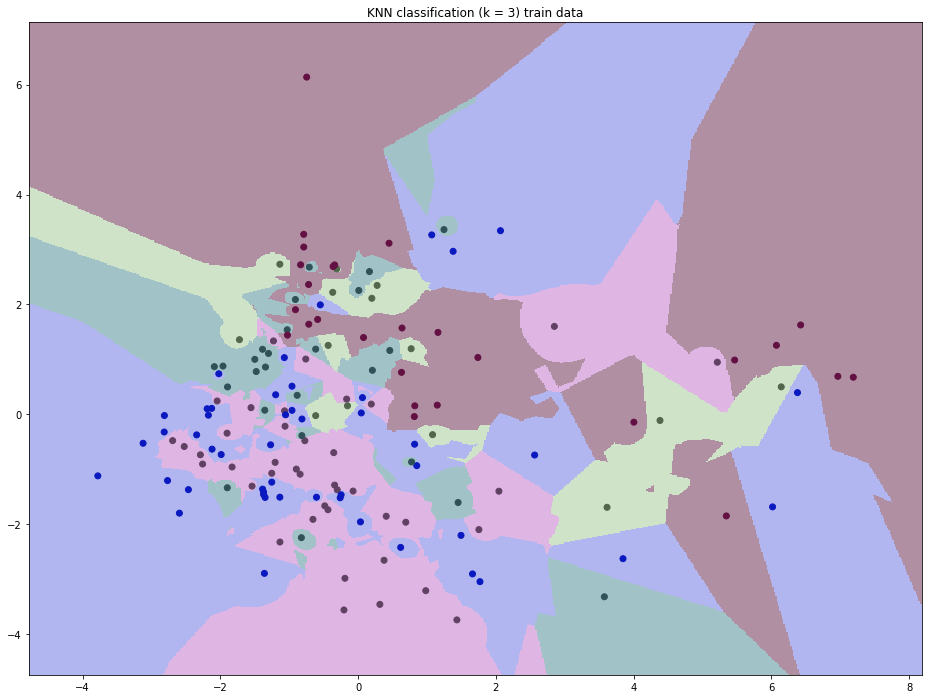

In [65]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
cmap_light = ListedColormap(['#b08fa3', '#cfe3c8','#a1c2c7', '#dfb6e3', '#b1b6f0'])
cmap_bold = ListedColormap(['#631043', '#52664b','#2f5157', '#604163', '#0a18bf'])
Z = modelPCA.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(16, 12))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN classification (k = 3) train data")
plt.show()

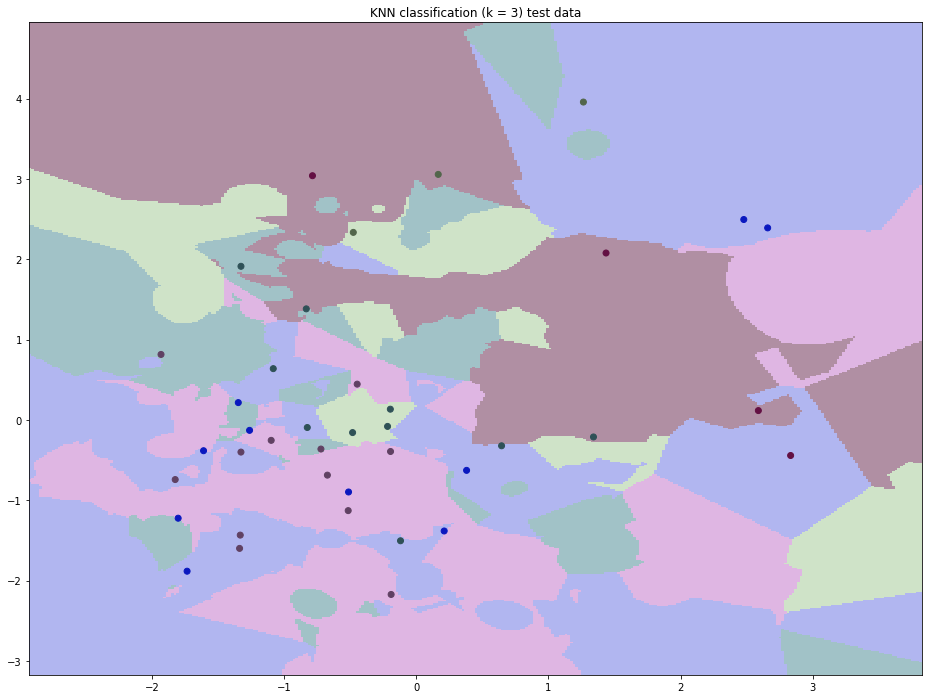

In [64]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
cmap_light = ListedColormap(['#b08fa3', '#cfe3c8','#a1c2c7', '#dfb6e3', '#b1b6f0'])
cmap_bold = ListedColormap(['#631043', '#52664b','#2f5157', '#604163', '#0a18bf'])
Z = modelPCA.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(16, 12))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN classification (k = 3) test data")
plt.show()